<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages

import tensorflow as tf
import pandas as pd # Pandas dataframe (very common in ML)
import numpy as np # import numpy to handle a lot of things!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM
import matplotlib.pyplot as plt # import plotting tools to create figures
from IPython.display import display, Math # to print with Latex math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm # to change colors of surface plots

# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook


In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

In [2]:
# Basic plotting tools needed in Python.

#%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15)#,
          #"text.usetex": True
          }
plt.rcParams.update(params)
linewidth=3.0

In [3]:
# import raw data
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/data91_all.csv'
df = pd.read_csv(url, delimiter=';')

In [29]:

# Split raw data in Input (X) and Output (Y) data
X_data_raw = df.loc[:,['Input_1','Input_5']].values
Y_data_raw = df.loc[:,['Output_1', 'Output_3']].values

In [30]:
#
#Scale Inputs with a [-1,1] scaler
scaler_x = MinMaxScaler(feature_range=(0,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_x = StandardScaler()
#
scaler_x.fit(X_data_raw)# fit the scaler to the input data
#
X_data_raw_scaled=scaler_x.transform(X_data_raw) # scale the input data (the whole dataset)
#
#Scale Inputs with a [-1,1] scaler
scaler_y = MinMaxScaler(feature_range=(0,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_y = StandardScaler()
#
_, idx = np.unique(Y_data_raw, axis=0, return_index=True)
Y_data_unique = Y_data_raw[np.sort(idx)]

scaler_y.fit(Y_data_unique) # fit the scaler to the output data
Y_data_unique_scaled=scaler_y.transform(Y_data_unique) # scale the output data (the whole dataset)



In [32]:
# Reshape data 
X_data = X_data_raw.reshape((91, 500, 2))
X_data_scaled = X_data_raw_scaled.reshape((91, 500, 2))

Y_data = Y_data_unique.reshape((91, 2, 1))
Y_data_scaled = Y_data_unique_scaled.reshape((91, 2, 1))


Text(0.5, 1.0, 'Normalized output data')

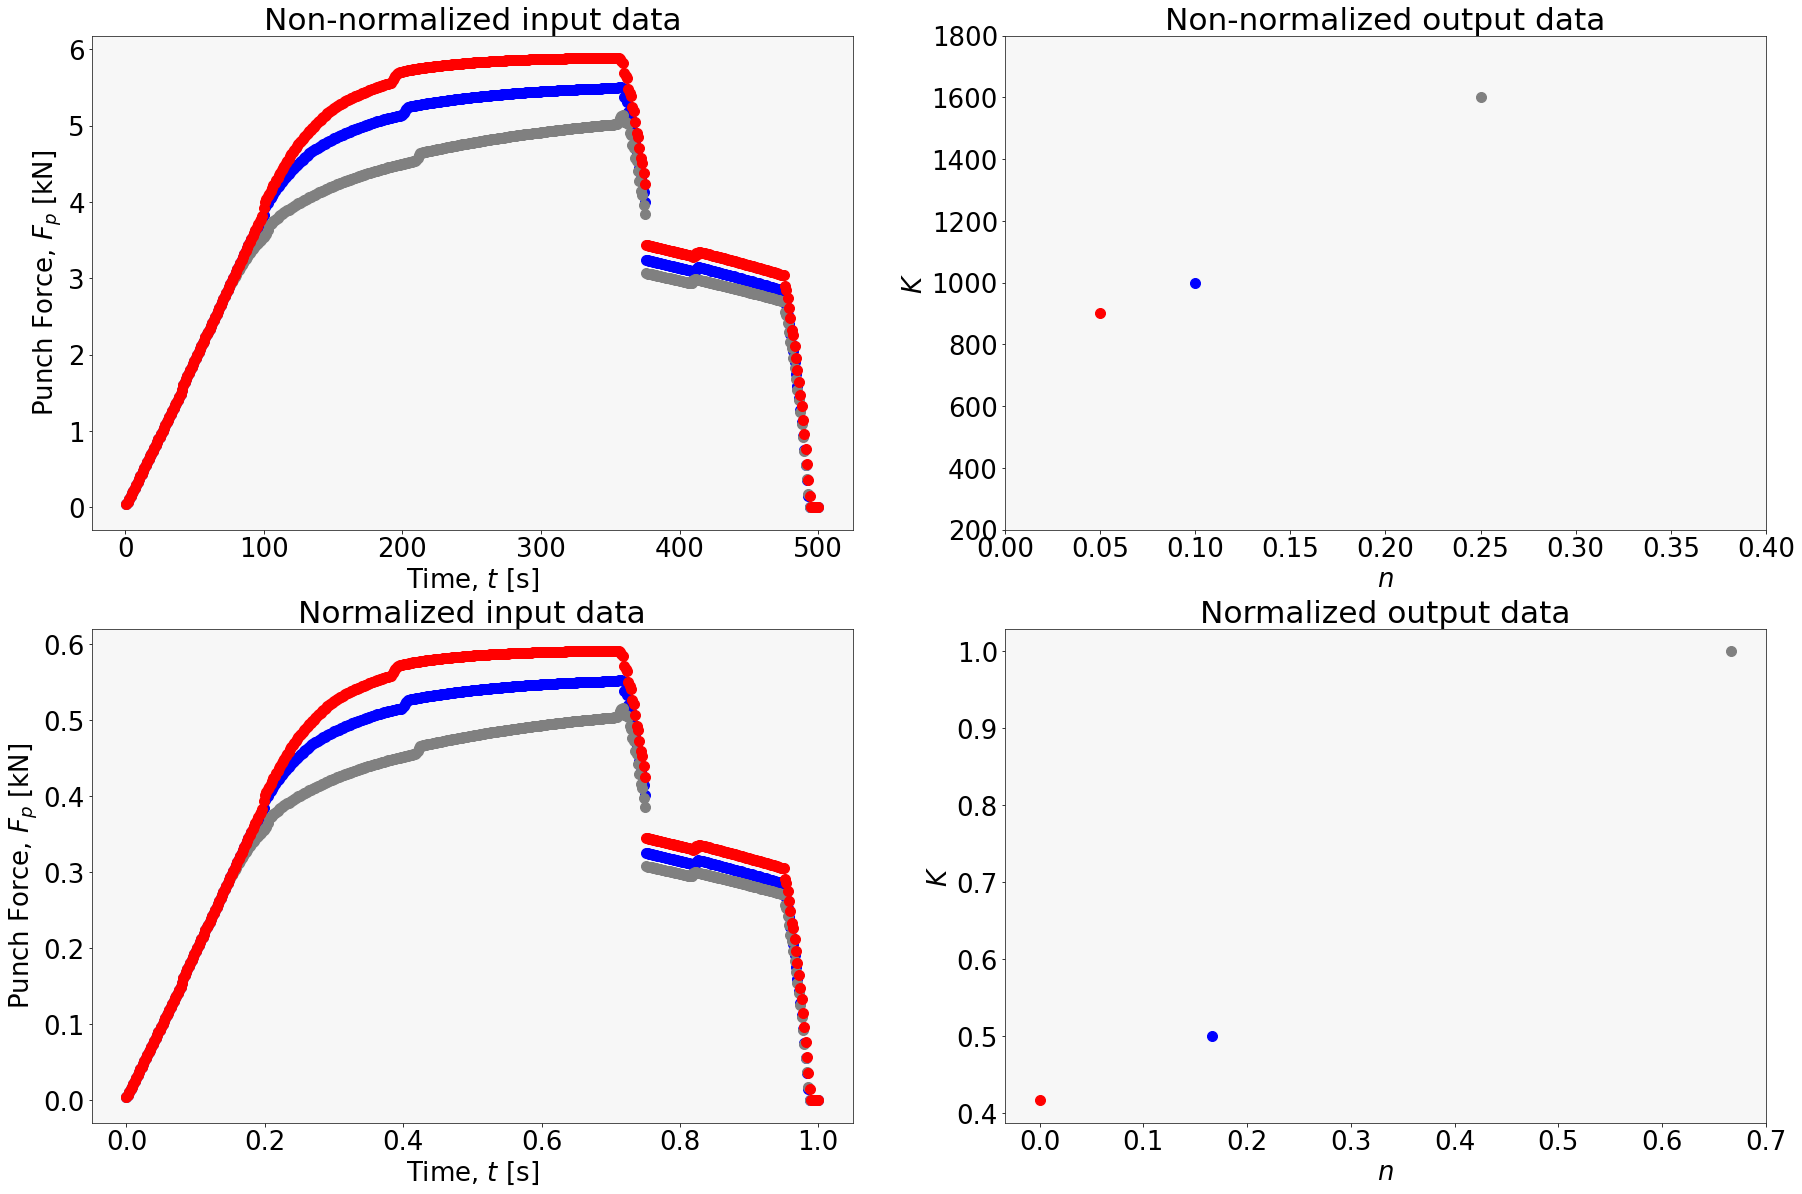

In [36]:
#Plots with normalized and Non-normalized inputs
fig_ANN, ((ax1_ANN, ax2_ANN), (ax3_ANN, ax4_ANN)) = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

#Case Studies to represent
Case_1 = 0
Case_2 = 45
Case_3 = 90

#Force Displacement Curves
ax1_ANN.plot(X_data[Case_1,:,0], X_data[Case_1,:,1], 'o', markersize=10, color='blue', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_data[Case_2,:,0], X_data[Case_2,:,1], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_data[Case_3,:,0], X_data[Case_3,:,1], 'o', markersize=10, color='red', label="training points") # show Non-normalized training data
ax1_ANN.set_ylabel('Punch Force, $F_p$ [kN]')
ax1_ANN.set_xlabel('Time, $t$ [s]')
ax1_ANN.set_title('Non-normalized input data')
#ax1_ANN.legen#d(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([0, 10])
# ax1_ANN.set_xlim([0, 20])

# K-n Points
ax2_ANN.plot(Y_data[Case_1,1,:], Y_data[Case_1,0,:], 'o', markersize=10, color='blue') # show normalized training data
ax2_ANN.plot(Y_data[Case_2,1,:], Y_data[Case_2,0,:], 'o', markersize=10, color='gray') # show normalized training data
ax2_ANN.plot(Y_data[Case_3,1,:], Y_data[Case_3,0,:], 'o', markersize=10, color='red') # show normalized training data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Non-normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax2_ANN.set_ylim([200, 1800])
ax2_ANN.set_xlim([0, 0.4])

ax3_ANN.plot(X_data_scaled[Case_1,:,0], X_data_scaled[Case_1,:,1], 'o', markersize=10, color='blue', label="training points") # show Non-normalized training data
ax3_ANN.plot(X_data_scaled[Case_2,:,0], X_data_scaled[Case_2,:,1], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax3_ANN.plot(X_data_scaled[Case_3,:,0], X_data_scaled[Case_3,:,1], 'o', markersize=10, color='red', label="training points") # show Non-normalized training data
ax3_ANN.set_ylabel('Punch Force, $F_p$ [kN]')
ax3_ANN.set_xlabel('Time, $t$ [s]')
ax3_ANN.set_title('Normalized input data')
#ax1_ANN.legen#d(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax3_ANN.set_ylim([-1, 1])
# ax3_ANN.set_xlim([-1, 1])

# K-n Points
ax4_ANN.plot(Y_data_scaled[Case_1,1,:], Y_data_scaled[Case_1,0,:], 'o', markersize=10, color='blue') # show normalized training data
ax4_ANN.plot(Y_data_scaled[Case_2,1,:], Y_data_scaled[Case_2,0,:], 'o', markersize=10, color='gray') # show normalized training data
ax4_ANN.plot(Y_data_scaled[Case_3,1,:], Y_data_scaled[Case_3,0,:], 'o', markersize=10, color='red') # show normalized training data
ax4_ANN.set_ylabel('$K$')
ax4_ANN.set_xlabel('$n$')
ax4_ANN.set_title('Normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax4_ANN.set_ylim([-1.25, 1.25])
# ax4_ANN.set_xlim([-1.25, 1.25])


# Create figure with specified size
# fig_ANN.set_size_inches(22, 10)

In [ ]:
print(Y_data_scaled[:,0,:])

In [87]:
# Divide datasets into train and test 

seed = 1000 # set a random seed to replicate results
np.random.seed(seed)

testvalset_ratio = 0.2 # ratio of test set points from the dataset

X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_data_scaled, Y_data_scaled[:,0,:],
                                                    test_size=testvalset_ratio,random_state=seed
                                                    )

print(Y_train_scaled.shape)

(72, 1)


Text(0.5, 1.0, 'Normalized output data')

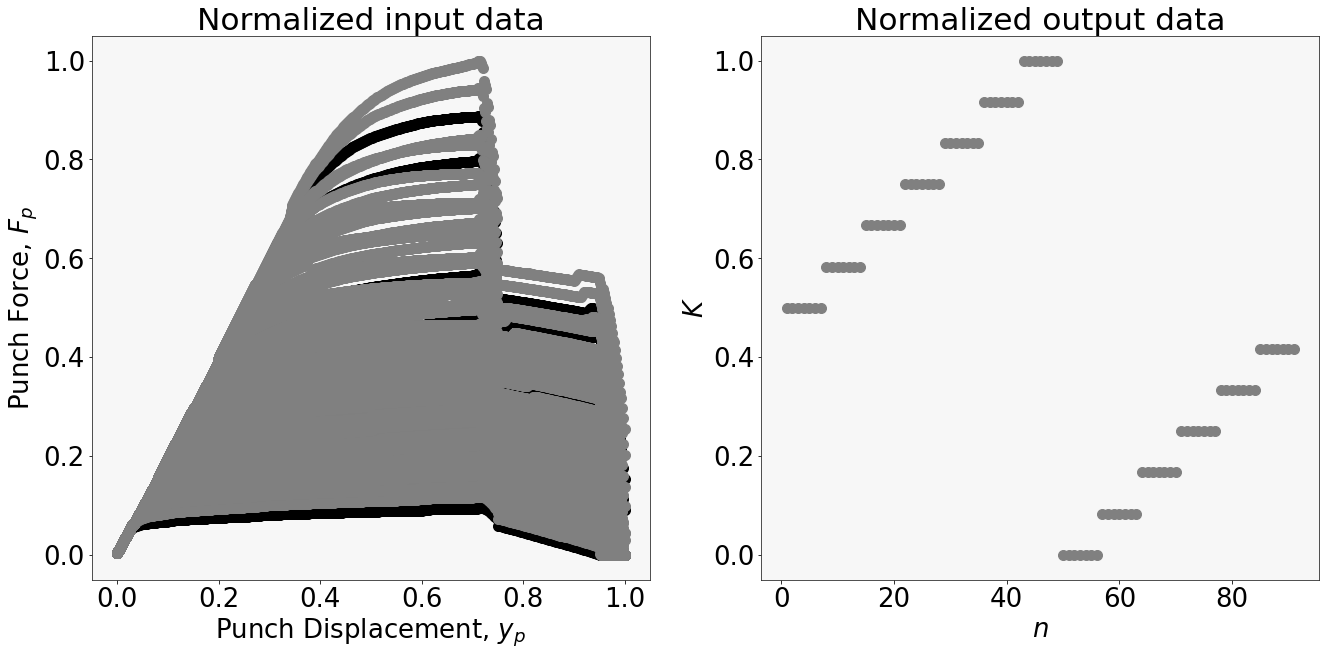

In [93]:
#Plots with normalized and Non-normalized outputs
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

cases = np.arange(1, 92, 1)

ax1_ANN.plot(X_test_scaled[:,:,0], X_test_scaled[:,:,1], 'o', markersize=10, color='black', label="testing points") # show normalized training data
ax1_ANN.plot(X_train_scaled[:,:,0], X_train_scaled[:,:,1], 'o', markersize=10, color='gray', label="training points") # show normalized training data
ax1_ANN.set_ylabel('Punch Force, $F_p$')
ax1_ANN.set_xlabel('Punch Displacement, $y_p$')
ax1_ANN.set_title('Normalized input data')
# ax1_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([-1.25, 1.25])
# ax1_ANN.set_xlim([-1.25, 1.25])
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)

# K-n Points
ax2_ANN.plot(cases, Y_data_scaled[:,0,:], 'o', markersize=10, color='gray') # show normalized training data
# ax2_ANN.plot(cases, Y_test_scaled, 'o', markersize=10, color='black', label="testing points") # show normalized training data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax2_ANN.set_ylim([-1.25, 1.25])
# ax2_ANN.set_xlim([-1.25, 1.25])


In [116]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(500, 2), activation='relu'))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32))
model.add(Dense(1, activation = "linear"))

In [119]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(500, 2)))
model.add(Dropout(0.5))
model.add(LSTM(20,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
# model.compile(loss='mse', optimizer='rmsprop')

In [120]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',
              optimizer=opt)
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 500, 64)           17152     
                                                                 
 dropout_17 (Dropout)        (None, 500, 64)           0         
                                                                 
 lstm_24 (LSTM)              (None, 20)                6800      
                                                                 
 dropout_18 (Dropout)        (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 23,973
Trainable params: 23,973
Non-trainable params: 0
_________________________________________________________________


In [121]:

# Train the model
history = model.fit(X_train_scaled, Y_train_scaled, validation_data=(X_test_scaled, Y_test_scaled), epochs=1000, batch_size=500)


Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 0.7314 - val_loss: 0.1145
Epoch 2/1000
1/1 [==============================] - 0s 107ms/step - loss: 0.1581 - val_loss: 0.1367
Epoch 3/1000
1/1 [==============================] - 0s 95ms/step - loss: 0.1057 - val_loss: 0.1113
Epoch 4/1000
1/1 [==============================] - 0s 86ms/step - loss: 0.1215 - val_loss: 0.1262
Epoch 5/1000
1/1 [==============================] - 0s 79ms/step - loss: 0.1375 - val_loss: 0.1255
Epoch 6/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.1205 - val_loss: 0.1123
Epoch 7/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.1018 - val_loss: 0.1116
Epoch 8/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.1193 - val_loss: 0.1184
Epoch 9/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.1048 - val_loss: 0.1167
Epoch 10/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.1133 - val_loss: 0.1118
Epoch 11/1

In [122]:
last_output = model.predict(X_test_scaled)
print(last_output)

1/1 [==============================] - 1s 613ms/step
[[0.4799991 ]
 [0.3008239 ]
 [0.01023781]
 [0.26556087]
 [0.04712245]
 [0.08854061]
 [0.83817554]
 [0.35564676]
 [0.00738424]
 [0.685148  ]
 [0.488317  ]
 [0.57240915]
 [0.6291996 ]
 [0.17209762]
 [0.41958666]
 [0.19304356]
 [0.87592465]
 [0.57119167]
 [0.66477025]]


(0.0, 1.0)

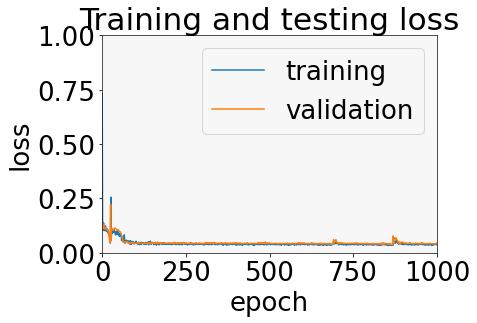

In [123]:
fig_ANN, (ax1_ANN) = plt.subplots(1,1)

ax1_ANN.plot(history.history['loss'])
ax1_ANN.plot(history.history['val_loss'])
ax1_ANN.set_title('Training and testing loss')
ax1_ANN.set_ylabel('loss')
ax1_ANN.set_xlabel('epoch')
ax1_ANN.legend(['training', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax1_ANN.set_xlim([0, 1000])
ax1_ANN.set_ylim([0, 1])

In [124]:
Y_data_ANNpred_scaled = history.model.predict(X_data_scaled)
# Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled)
# Y_data_ANNpred_scaled = Y_data_ANNpred_scaled.reshape(91,1,1)
# Y_data_ANNpred = Y_data_ANNpred.reshape(91,1,1)


3/3 [==============================] - 0s 23ms/step


In [125]:
print(np.arange(1, 92, 1))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]


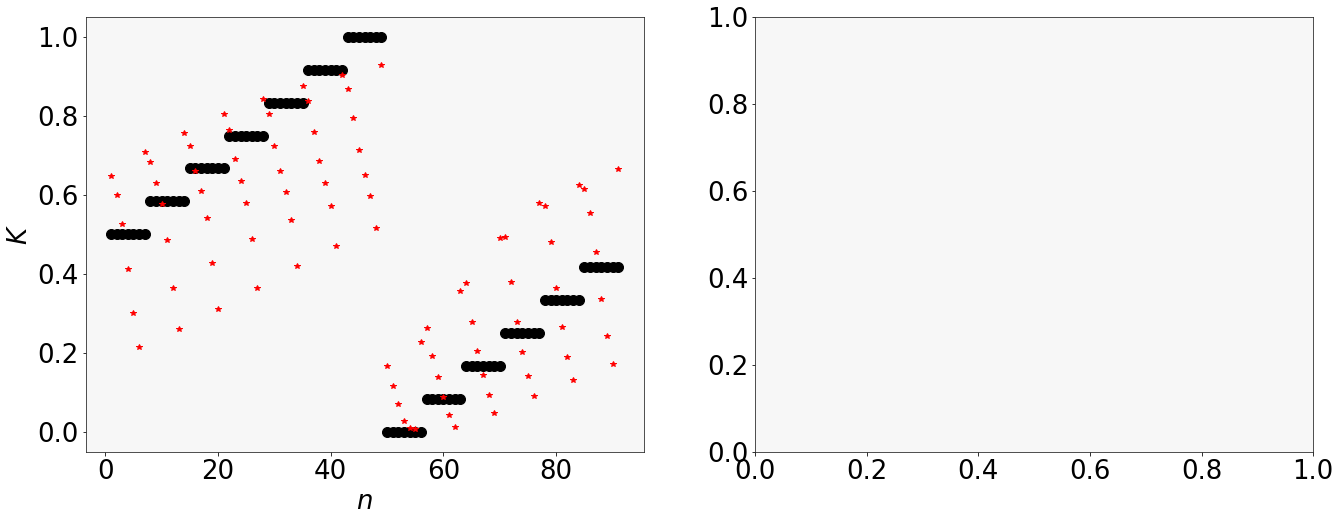

In [126]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

cases = np.arange(1, 92, 1)
ax1_ANN.plot(cases, Y_data_scaled[:,0,:], 'o', markersize=10, color='black', label="testing points") # show training data
ax1_ANN.plot(cases, Y_data_ANNpred_scaled, marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')

# ax2_ANN.plot(Y_data[:,1,:], Y_data[:,0,:], 'o', markersize=10, color='gray', label="training points") # show training data
# ax2_ANN.plot(Y_data_ANNpred[:,1], Y_data_ANNpred[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
# ax2_ANN.set_ylabel('$K$')
# ax2_ANN.set_xlabel('$n$')
# # ax2_ANN.legend(loc='best')
# ax2_ANN.set_xlim([0, 0.4])
# ax2_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
fig_ANN.set_size_inches(22, 8)